# 0. Limpeza e ajustes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as r
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import sklearn as sk

In [2]:
A = pd.read_csv("survey_results_public.csv")

/home/matheus/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
B = A[['DevType','Age', 'YearsCoding', 'UndergradMajor','LastNewJob','FormalEducation', 
   'CompanySize','YearsCodingProf',
 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10','LanguageWorkedWith','DatabaseWorkedWith','FrameworkWorkedWith', 'OperatingSystem', 'ConvertedSalary']]

In [4]:
#B['UndergradMajor'].fillna("I never declared a major",inplace=True)

In [5]:
A = A[A['Employment'] == "Employed full-time"]

In [6]:
B = B.dropna(how='any',inplace=False,)

In [7]:
sum(B.isna().values)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [8]:
B = B[B['DevType'].apply(lambda x: 'Data scientist or machine learning specialist' in x)]

In [9]:
def drop_dummy(df, List, ans):
    if len(List) == 0:
        return df, List, ans
    elif List[-1]=="Age":
        first = List.pop()
        dummy = pd.get_dummies(df[first], drop_first=False,prefix=first, prefix_sep="_" )
        dummy = dummy.drop(columns=["Age_65 years or older"])
        dummy_list = list(dummy)
        try:
            ans[dummy_list] = dummy
        except:
            ans = dummy
        return drop_dummy(df, List, ans)
    else:
        first = List.pop()
        dummy = pd.get_dummies(df[first], drop_first=True,prefix=first, prefix_sep="_" )
        dummy_list = list(dummy)
        try:
            ans[dummy_list] = dummy
        except:
            ans = dummy
        return drop_dummy(df, List, ans)

List_of_dummys = ['Age', 'YearsCoding', 'UndergradMajor','FormalEducation', 
   'CompanySize','YearsCodingProf', 'LastNewJob','OperatingSystem']
bar, foo,df = drop_dummy(B, List_of_dummys[:],1)

B[list(df)] = df
B = B.drop(columns=["LastNewJob_I've never had a job",'UndergradMajor_Web development or web design','UndergradMajor_A health science (ex. nursing, pharmacy, radiology)'])

In [10]:
B = B.drop(columns=List_of_dummys)
print(List_of_dummys)

['Age', 'YearsCoding', 'UndergradMajor', 'FormalEducation', 'CompanySize', 'YearsCodingProf', 'LastNewJob', 'OperatingSystem']


In [11]:
B = B.drop(columns=['DevType'])

In [12]:
for language in ["Python","SQL", "R","Java","SQL","JavaScript","C++","Matlab","Bash/Shell","Scala","VBA","PHP","HTML","Go","C#", "C", "Julia"]:
    print(str(B[B['LanguageWorkedWith'].apply(lambda x: language in x)].shape) + language)

(1448, 66)Python
(1235, 66)SQL
(804, 66)R
(1409, 66)Java
(1235, 66)SQL
(1172, 66)JavaScript
(558, 66)C++
(280, 66)Matlab
(1047, 66)Bash/Shell
(331, 66)Scala
(130, 66)VBA
(369, 66)PHP
(1089, 66)HTML
(229, 66)Go
(525, 66)C#
(1365, 66)C
(45, 66)Julia


In [13]:
#MATLAB, VBA, GO, Scala, C++, PHP, C# Julia caem fora
languages = ["Python","SQL", "R","Java","SQL","JavaScript","Bash/Shell","HTML", "C"]
for language in languages:
    B[language] = B['LanguageWorkedWith'].apply(lambda x: int(language in x))
B = B.drop(columns=["LanguageWorkedWith"])

In [14]:
for language in ["MySQL","PostgreSQL",'SQLite','Google BigQuery','Elasticsearch','SQL Server','Amazon DynamoDB','Microsoft Azure','MongoDB']:
    print(str(B[B['DatabaseWorkedWith'].apply(lambda x: language in x)].shape) + language)

(982, 73)MySQL
(833, 73)PostgreSQL
(404, 73)SQLite
(136, 73)Google BigQuery
(423, 73)Elasticsearch
(679, 73)SQL Server
(159, 73)Amazon DynamoDB
(208, 73)Microsoft Azure
(627, 73)MongoDB


In [15]:
#Ficam MySQL, PostgreSQL, SQL Server, MongoDB
dbases = ["MySQL","PostgreSQL","SQL Server", "MongoDB"]
for db in dbases:
    B[db] = B['DatabaseWorkedWith'].apply(lambda x: int(db in x))
B = B.drop(columns=["DatabaseWorkedWith"])
B.head()

,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,...,R,Java,JavaScript,Bash/Shell,HTML,C,MySQL,PostgreSQL,SQL Server,MongoDB
62,5.0,9.0,4.0,10.0,6.0,1.0,3.0,7.0,2.0,8.0,...,0,0,0,0,0,1,1,1,0,0
126,8.0,6.0,3.0,1.0,7.0,4.0,9.0,2.0,10.0,5.0,...,0,1,1,0,1,1,1,1,0,0
131,6.0,1.0,2.0,5.0,9.0,4.0,7.0,3.0,10.0,8.0,...,1,0,0,0,1,1,1,1,1,0
136,8.0,7.0,5.0,3.0,4.0,6.0,10.0,2.0,9.0,1.0,...,0,1,1,0,1,1,0,0,1,0
211,7.0,4.0,8.0,5.0,9.0,2.0,6.0,1.0,10.0,3.0,...,0,1,1,0,1,1,0,0,0,0


In [16]:
for language in ["Hadoop","Spark",'Django','React','Node.js','TensorFlow','.NET Core','Angular','Xamarin']:
    print(str(B[B['FrameworkWorkedWith'].apply(lambda x: language in x)].shape) + language)

(390, 76)Hadoop
(510, 76)Spark
(338, 76)Django
(346, 76)React
(671, 76)Node.js
(736, 76)TensorFlow
(333, 76).NET Core
(431, 76)Angular
(84, 76)Xamarin


In [17]:
#Ficam TensorFlow, Node.js, Spark, Angular
frameworks = ["TensorFlow", "Node.js", "Spark", "Angular"]
for fw in frameworks:
    B[fw] = B['FrameworkWorkedWith'].apply(lambda x: int(fw in x))
B = B.drop(columns=['FrameworkWorkedWith'])
B.head()

,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,...,HTML,C,MySQL,PostgreSQL,SQL Server,MongoDB,TensorFlow,Node.js,Spark,Angular
62,5.0,9.0,4.0,10.0,6.0,1.0,3.0,7.0,2.0,8.0,...,0,1,1,1,0,0,0,0,1,0
126,8.0,6.0,3.0,1.0,7.0,4.0,9.0,2.0,10.0,5.0,...,1,1,1,1,0,0,0,0,1,0
131,6.0,1.0,2.0,5.0,9.0,4.0,7.0,3.0,10.0,8.0,...,1,1,1,1,1,0,1,0,0,0
136,8.0,7.0,5.0,3.0,4.0,6.0,10.0,2.0,9.0,1.0,...,1,1,0,0,1,0,0,0,0,0
211,7.0,4.0,8.0,5.0,9.0,2.0,6.0,1.0,10.0,3.0,...,1,1,0,0,0,0,0,1,0,1


In [18]:
from sklearn.model_selection import train_test_split
B = B.dropna(how='any',inplace=False)
train, test = train_test_split(B, test_size=0.2)
sum(sum(B.isna().values))

0

In [19]:
test = test.dropna(how='any',inplace=False)
test = (test - test.mean()) / test.std(ddof=0)
sum(sum(test.isna().values))

0

In [20]:
listA = test.std(ddof=0)
listB = list(test)
[(listA[i],listB[i]) for i in range(len(listA))]

[(1.0000000000000004, 'AssessJob1'),
 (0.9999999999999986, 'AssessJob2'),
 (1.0000000000000004, 'AssessJob3'),
 (1.0000000000000007, 'AssessJob4'),
 (1.0000000000000009, 'AssessJob5'),
 (0.9999999999999994, 'AssessJob6'),
 (0.9999999999999989, 'AssessJob7'),
 (1.0000000000000002, 'AssessJob8'),
 (1.000000000000001, 'AssessJob9'),
 (1.0000000000000004, 'AssessJob10'),
 (1.0000000000000004, 'ConvertedSalary'),
 (1.0000000000000022, 'OperatingSystem_Linux-based'),
 (1.0000000000000022, 'OperatingSystem_MacOS'),
 (0.9999999999999993, 'OperatingSystem_Windows'),
 (1.0000000000000002, 'LastNewJob_Between 2 and 4 years ago'),
 (1.0000000000000022, 'LastNewJob_Less than a year ago'),
 (0.9999999999999992, 'LastNewJob_More than 4 years ago'),
 (1.0000000000000004, 'YearsCodingProf_12-14 years'),
 (1.0000000000000009, 'YearsCodingProf_15-17 years'),
 (1.000000000000004, 'YearsCodingProf_18-20 years'),
 (1.000000000000002, 'YearsCodingProf_21-23 years'),
 (1.000000000000003, 'YearsCodingProf_24-2

In [21]:
train = train.dropna(how='any',inplace=False)
train = (train - train.mean()) / train.std(ddof=0) + 0.01 * (train - train.mean())
sum(sum(train.isna().values))

0

In [22]:
train.head()

,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,...,HTML,C,MySQL,PostgreSQL,SQL Server,MongoDB,TensorFlow,Node.js,Spark,Angular
5042,1.355014,0.448540,0.527166,-1.389817,-0.731246,0.670827,-0.412550,-0.068085,0.545959,-0.950245,...,0.786870,0.538817,-1.120743,-0.944442,-0.792776,1.372030,-0.859432,1.306554,-0.629660,-0.578211
17815,-1.951427,0.448540,-0.227906,0.951217,0.137549,-1.000935,1.398583,-0.478910,-0.750809,1.325849,...,0.786870,0.538817,-1.120743,-0.944442,1.273688,-0.735812,1.175083,-0.772788,-0.629660,-0.578211
7389,-1.584045,-0.365318,1.659775,1.341390,0.571946,-0.582995,-0.774776,-1.300560,-0.318553,1.325849,...,0.786870,0.538817,0.901157,1.069421,-0.792776,-0.735812,-0.859432,1.306554,-0.629660,1.744461
50942,0.252867,-1.179175,-0.227906,1.731562,-0.731246,0.670827,0.674130,-1.300560,0.978215,-0.950245,...,0.786870,0.538817,-1.120743,-0.944442,-0.792776,-0.735812,1.175083,-0.772788,-0.629660,1.744461
60618,-1.951427,-0.772247,0.149630,1.341390,0.137549,-1.000935,1.398583,-0.478910,0.545959,0.567151,...,-1.283226,0.538817,-1.120743,-0.944442,-0.792776,-0.735812,-0.859432,-0.772788,1.602485,-0.578211


# Parte 1: Introdução

1. Descreva a base em conjunto com sua pergunta de pesquisa.
2. Apresente uma descrição da base de dados utilizada, explicitando cada uma das variáveis dependentes, a variável independente, número de amostras e problema sendo tratado.

Trata-se da StackOverflow Developer Survey de 2018, no qual fiz algumas restrições:
* Apenas cientistas de dados
* Apenas profissionais empregados
* Apenas parâmetros do modelo que sejam factíveis de estarem em mãos de um recrutator

A maior parte das variáveis dependentes são auto-explicativas, se a pessoa progama em determinada linguagem, se a pessoa utiliza determinada tecnologia de banco de dados, se a pessoa utiliza determinado framework, etc. O que fica na dǘvida apenas são as variáveis AcessJob, que na Survey é um campo de ordenar 10 coisas importantes para você num emprego.

* The industry that I'd be working in
* The financial performance or funding status of the company or organization
* The specific department or team I'd be working on
* The languages, frameworks, and other technologies I'd be working with
* The compensation and benefits offered
* The office environment or company culture
* The opportunity to work from home/remotely
* Opportunities for professional development
* The diversity of the company or organization
* How widely used or impactful the product or service I'd be working on is

A pergunta do estudo é **Dadas as informações que tenho sobre este profissional de Data Science, quanto ele provavelmente deve receber na empresa atual dele?** 

Essa pergunta faz sentido, por exemplo, numa empresa que precisa fazer uma proposta para um profissional de outra empresa e precisa ter uma estimativa educada do quanto ele ganha lá.

Neste trabalho teremos

In [23]:
B.shape[0]

1773

amostras, divididas 80% em treino e 20% em teste. A variável independente é

In [24]:
B['ConvertedSalary'].head()

62     120000.0
126     30597.0
131     42348.0
136     55392.0
211     46992.0
Name: ConvertedSalary, dtype: float64

onde é o salário convertido a dólar do dia 18/01/2018.

3. Apresente estatı́sticas descritivas (média, mediana, variância/desvio padrão, quartis, máximo e mı́nimo, etc.) das varı́aveis. Seja criterioso sobre quais estatı́sticas serão mostradas e quais fazem sentido.

In [25]:
B[['ConvertedSalary', 'LastNewJob_Between 2 and 4 years ago', 'LastNewJob_Less than a year ago', 'LastNewJob_More than 4 years ago',
 'CompanySize_10 to 19 employees', 'CompanySize_10,000 or more employees', 'CompanySize_100 to 499 employees', 'CompanySize_20 to 99 employees', 'CompanySize_5,000 to 9,999 employees',
 'CompanySize_500 to 999 employees', 'CompanySize_Fewer than 10 employees', 'FormalEducation_Bachelor’s degree (BA, BS, B.Eng., etc.)', 
 'FormalEducation_Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'FormalEducation_Other doctoral degree (Ph.D, Ed.D., etc.)', 
 'FormalEducation_Professional degree (JD, MD, etc.)',
 'FormalEducation_Some college/university study without earning a degree', 'UndergradMajor_Mathematics or statistics',
 'Python', 'SQL', 'R', 'HTML', 'C', 'TensorFlow', 'Node.js']].describe()

,ConvertedSalary,LastNewJob_Between 2 and 4 years ago,LastNewJob_Less than a year ago,LastNewJob_More than 4 years ago,CompanySize_10 to 19 employees,"CompanySize_10,000 or more employees",CompanySize_100 to 499 employees,CompanySize_20 to 99 employees,"CompanySize_5,000 to 9,999 employees",CompanySize_500 to 999 employees,...,"FormalEducation_Professional degree (JD, MD, etc.)",FormalEducation_Some college/university study without earning a degree,UndergradMajor_Mathematics or statistics,Python,SQL,R,HTML,C,TensorFlow,Node.js
count,1.773000e+03,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,...,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000
mean,1.127675e+05,0.219966,0.377327,0.157924,0.099267,0.197970,0.170333,0.201918,0.053582,0.057530,...,0.008460,0.077834,0.116187,0.816695,0.696560,0.453469,0.614213,0.769882,0.415116,0.378455
std,2.175229e+05,0.414340,0.484854,0.364773,0.299104,0.398581,0.376031,0.401544,0.225254,0.232917,...,0.091615,0.267986,0.320540,0.387026,0.459874,0.497971,0.486918,0.421027,0.492881,0.485139
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.369600e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,6.756000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.095810e+05,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.000000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


4. Apresente pelo menos duas outras análises ou visualizações interessantes e discuta o que você encontrou.

Text(0,0.5,'Quantidade de programadores')

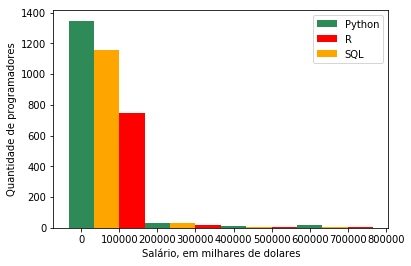

In [26]:
fig, ax = plt.subplots()

X = B[B['Python']==1]['ConvertedSalary']
Y = B[B['R']==1]['ConvertedSalary']
Z = B[B['SQL']==1]['ConvertedSalary']
br_heights, br_bins = [i[0:-6] for  i in np.histogram(X)]
usa_heights, usa_bins = np.histogram(Y, bins=br_bins)
ind_heights, ind_bins = np.histogram(Z, bins=br_bins)

width = (br_bins[1] - br_bins[0])/3

ax.bar(br_bins[:-1], br_heights, width=width, facecolor='seagreen')
ax.bar(usa_bins[:-1]+2*width, usa_heights, width=width, facecolor = 'red')
ax.bar(ind_bins[:-1]+width, ind_heights, width=width, facecolor = 'orange')
ax.legend(['Python','R','SQL'])
plt.xlabel('Salário, em milhares de dolares')
plt.ylabel('Quantidade de programadores')

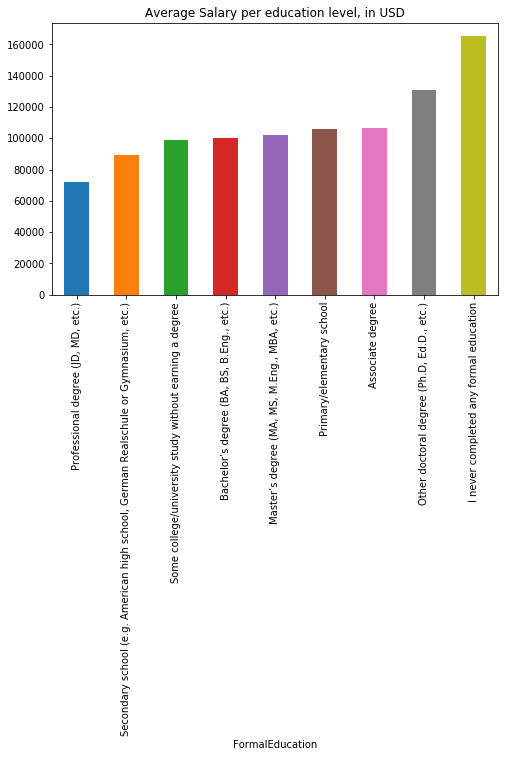

In [27]:
X = A.groupby('FormalEducation')['ConvertedSalary'].mean()
X.sort_values(inplace=True, ascending=True)
X.plot(kind='bar',figsize=(8,5),title='Average Salary per education level, in USD')

5. Divida sua base aleatóriamente em treino e teste, deixando claro as proporções.

Já dividi acima, a proporção é 80-20.

# 2 - Metodologia

## 2.1 Linear regression

1. Liste quais variáveis dependentes e independentes serão utilizadas.

In [28]:
foo = list(train)
foo.remove('ConvertedSalary')
print(foo)

['AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10', 'OperatingSystem_Linux-based', 'OperatingSystem_MacOS', 'OperatingSystem_Windows', 'LastNewJob_Between 2 and 4 years ago', 'LastNewJob_Less than a year ago', 'LastNewJob_More than 4 years ago', 'YearsCodingProf_12-14 years', 'YearsCodingProf_15-17 years', 'YearsCodingProf_18-20 years', 'YearsCodingProf_21-23 years', 'YearsCodingProf_24-26 years', 'YearsCodingProf_27-29 years', 'YearsCodingProf_3-5 years', 'YearsCodingProf_30 or more years', 'YearsCodingProf_6-8 years', 'YearsCodingProf_9-11 years', 'CompanySize_10 to 19 employees', 'CompanySize_10,000 or more employees', 'CompanySize_100 to 499 employees', 'CompanySize_20 to 99 employees', 'CompanySize_5,000 to 9,999 employees', 'CompanySize_500 to 999 employees', 'CompanySize_Fewer than 10 employees', 'FormalEducation_Bachelor’s degree (BA, BS, B.Eng., etc.)', 'FormalEducation_Master’s degree (M

In [29]:
def my_linear_least_squares_regression(X,Y):
    X = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
    Xcros = np.linalg.inv(np.matmul(X.transpose(),X))
    beta = np.matmul(np.matmul(Xcros,X.transpose()),Y.transpose())
    return beta

In [30]:
beta = my_linear_least_squares_regression(train[foo].values,train['ConvertedSalary'].values)

In [31]:
beta.shape

(79,)

In [53]:
def my_linear_least_squares_regression_R2(beta,X_test, Y_test):
    N = Y_test.shape[0]
    X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)
    ymean = sum(Y_test)/N
    predict = np.matmul(X_test,beta)
    stot = sum([(y - ymean)**2 for y in Y_test])
    sres = sum([(Y_test[i] - predict[i])**2 for i in range(Y_test.shape[0])])
    return 1 - sres/stot

In [54]:
my_linear_least_squares_regression_R2(beta,test[foo].values,test['ConvertedSalary'].values)

-546428.1259894856

In [55]:
A = list(test)
concat = []
for item in range(len(beta)-1):
    concat.append((A[item],beta[item+1]))
concat.sort(key=lambda x: abs(x[1]), reverse=True)
for item in concat:
    print(item)

('OperatingSystem_MacOS', 671.6046416930651)
('OperatingSystem_Linux-based', 616.5619690713938)
('ConvertedSalary', 423.04673322353426)
('Age_18 - 24 years old', -335.50743311347304)
('Age_25 - 34 years old', -323.19411010376075)
('YearsCodingProf_30 or more years', 280.46689483813424)
('YearsCodingProf_27-29 years', 259.786783579759)
('YearsCodingProf_12-14 years', 246.95507106423884)
('FormalEducation_Bachelor’s degree (BA, BS, B.Eng., etc.)', -218.88046456146847)
('YearsCoding_27-29 years', -218.31567112595275)
('YearsCodingProf_15-17 years', 215.58385119690226)
('CompanySize_Fewer than 10 employees', -211.14649350993102)
('YearsCodingProf_6-8 years', 205.88969001354553)
('YearsCoding_9-11 years', -173.12128417163586)
('YearsCoding_30 or more years', -167.6148997571756)
('Node.js', 165.68762381781085)
('Age_55 - 64 years old', 154.8266460904767)
('UndergradMajor_A natural science (ex. biology, chemistry, physics)', 152.08594821434883)
('LastNewJob_More than 4 years ago', 143.2560049

Como estou fazendo regressão linear, a maior parte das coisas pedidas não fazem sentido.

# 2.2. RIDGE

In [67]:
foo = list(train)
foo.remove('ConvertedSalary')
print(foo)

['AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10', 'OperatingSystem_Linux-based', 'OperatingSystem_MacOS', 'OperatingSystem_Windows', 'LastNewJob_Between 2 and 4 years ago', 'LastNewJob_Less than a year ago', 'LastNewJob_More than 4 years ago', 'YearsCodingProf_12-14 years', 'YearsCodingProf_15-17 years', 'YearsCodingProf_18-20 years', 'YearsCodingProf_21-23 years', 'YearsCodingProf_24-26 years', 'YearsCodingProf_27-29 years', 'YearsCodingProf_3-5 years', 'YearsCodingProf_30 or more years', 'YearsCodingProf_6-8 years', 'YearsCodingProf_9-11 years', 'CompanySize_10 to 19 employees', 'CompanySize_10,000 or more employees', 'CompanySize_100 to 499 employees', 'CompanySize_20 to 99 employees', 'CompanySize_5,000 to 9,999 employees', 'CompanySize_500 to 999 employees', 'CompanySize_Fewer than 10 employees', 'FormalEducation_Bachelor’s degree (BA, BS, B.Eng., etc.)', 'FormalEducation_Master’s degree (M

In [74]:
def my_linear_ridge(X,Y,lamb):
    X = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
    Xcros = np.linalg.inv(np.matmul(X.transpose(),X)-lamb * np.identity(X.shape[1]))
    beta = np.matmul(np.matmul(Xcros,X.transpose()),Y.transpose())
    return beta

In [75]:
beta = my_linear_ridge(train[foo].values,train['ConvertedSalary'].values,0.1)

In [71]:
A = list(test)
concat = []
for item in range(len(beta)-1):
    concat.append((A[item],beta[item+1]))
concat.sort(key=lambda x: abs(x[1]), reverse=True)
for item in concat:
    print(item)

('OperatingSystem_MacOS', 671.6046416930651)
('OperatingSystem_Linux-based', 616.5619690713938)
('ConvertedSalary', 423.04673322353426)
('Age_18 - 24 years old', -335.50743311347304)
('Age_25 - 34 years old', -323.19411010376075)
('YearsCodingProf_30 or more years', 280.46689483813424)
('YearsCodingProf_27-29 years', 259.786783579759)
('YearsCodingProf_12-14 years', 246.95507106423884)
('FormalEducation_Bachelor’s degree (BA, BS, B.Eng., etc.)', -218.88046456146847)
('YearsCoding_27-29 years', -218.31567112595275)
('YearsCodingProf_15-17 years', 215.58385119690226)
('CompanySize_Fewer than 10 employees', -211.14649350993102)
('YearsCodingProf_6-8 years', 205.88969001354553)
('YearsCoding_9-11 years', -173.12128417163586)
('YearsCoding_30 or more years', -167.6148997571756)
('Node.js', 165.68762381781085)
('Age_55 - 64 years old', 154.8266460904767)
('UndergradMajor_A natural science (ex. biology, chemistry, physics)', 152.08594821434883)
('LastNewJob_More than 4 years ago', 143.2560049

In [61]:
my_linear_least_squares_regression_R2(beta,test[foo].values,test['ConvertedSalary'].values)

-546428.1259894856

In [147]:
lambdas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,100000,1000000,10000000,100000000,1000000000,10000000000]
for lamb in lambdas:
    beta = my_linear_ridge(train[foo].values,train['ConvertedSalary'].values,lamb)
    sols.append((lamb,beta,my_linear_least_squares_regression_R2(beta,test[foo].values,test['ConvertedSalary'].values)))
sols.sort(reverse=True,key=lambda x: x[2])
sols[0]

(10000000000,
 array([-1.35525272e-20, -1.20283935e-06,  1.35953889e-05,  2.78026924e-06,
         6.77685953e-07,  2.11020229e-05, -1.04845894e-05,  5.11476191e-06,
        -8.36155191e-06, -8.87976777e-06, -1.36385803e-05,  2.19230013e-05,
        -1.53886621e-05, -6.23227944e-06,  6.06679687e-06,  1.33176090e-05,
        -1.39471651e-05, -2.47279677e-06, -2.13219455e-05, -1.74926892e-05,
        -4.32354328e-06,  9.79099370e-07, -5.20030442e-06,  4.92540264e-06,
        -6.06947173e-06, -1.57050389e-05, -6.67832441e-06,  7.62732342e-07,
        -2.42663395e-05,  1.44817654e-05, -3.59176060e-06, -1.53192406e-06,
        -5.55693576e-07,  1.95164630e-05,  1.69691416e-05,  4.84994737e-06,
        -3.44407511e-05,  1.06036584e-05, -1.51131467e-06, -1.73361248e-05,
        -2.03104913e-05, -1.88196049e-05,  5.75672326e-06,  1.70973668e-05,
         4.61711633e-06,  2.88632305e-06,  1.78057447e-05, -9.53235922e-06,
        -2.30766724e-06, -2.20772866e-05, -1.74211569e-05, -1.60805706e-06